<h1 style='color:Blue' align='left'>Melting efficiency evaluation in wire arc additive manufacturing: A machine learning approach</h1> 

<h3 style='color:orange' align='left'>Importing libraries and data</h3> 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_table('data.txt') 
df.head()

,Wire_diameter,Wire_Feed_Speed,Travel_Speed,Power,Melting_Efficiency
0,0.8,39.33,5.00,531.22,0.396
1,0.8,48.33,6.66,693.84,0.414
2,0.8,66.83,8.34,959.70,0.433
3,0.8,80.00,10.00,1113.30,0.446
4,0.8,94.33,11.67,1277.70,0.445


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wire_diameter       75 non-null     float64
 1   Wire_Feed_Speed     75 non-null     float64
 2   Travel_Speed        75 non-null     float64
 3   Power               75 non-null     float64
 4   Melting_Efficiency  75 non-null     float64
dtypes: float64(5)
memory usage: 3.1 KB


In [4]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,Wire_diameter,Wire_Feed_Speed,Travel_Speed,Power,Melting_Efficiency
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.954667,95.451333,8.326533,1819.171733,0.445693
std,0.172653,53.012550,5.220140,757.431591,0.055220
min,0.800000,28.000000,1.660000,531.220000,0.307000
25%,0.800000,54.585000,4.450000,1171.550000,0.411000
50%,0.800000,80.330000,6.670000,1798.200000,0.445000
75%,1.200000,123.250000,10.980000,2435.315000,0.491500
90%,1.200000,188.198000,15.332000,2878.692000,0.512800
99%,1.200000,221.760000,23.764200,3243.092000,0.546340
max,1.200000,222.500000,25.000000,3266.550000,0.553000


<h3 style='color:orange' align='left'>Checking for missing data and building intuition on the data</h3> 

In [5]:
df.isnull().sum()

Wire_diameter         0
Wire_Feed_Speed       0
Travel_Speed          0
Power                 0
Melting_Efficiency    0
dtype: int64

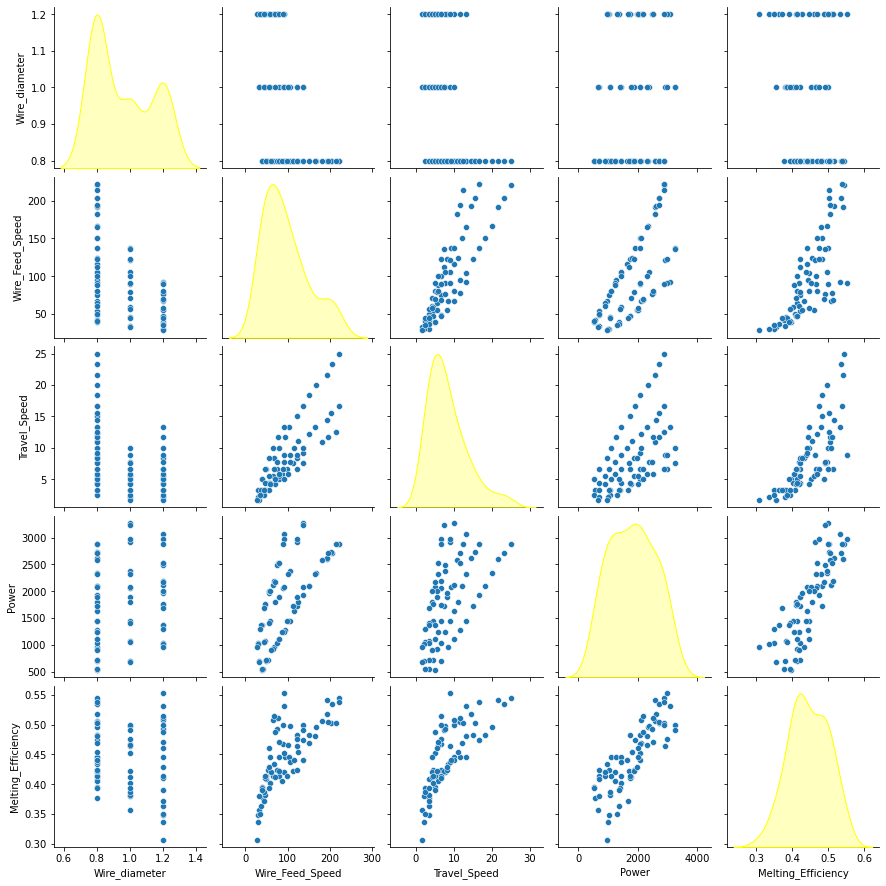

In [6]:
sns.pairplot(df,diag_kind='kde',diag_kws={'color':'yellow'})

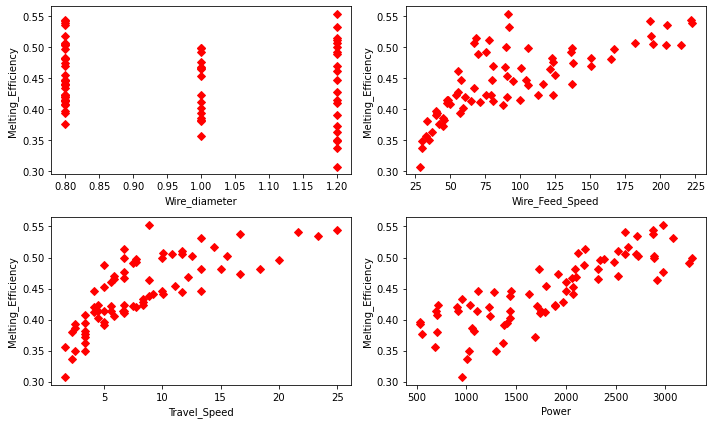

In [7]:
parameters = ['Wire_diameter', 'Wire_Feed_Speed','Travel_Speed','Power']

fig = plt.figure()
fig.set_size_inches((10,6))
for i,parameter in enumerate(parameters):
  plt.subplot(2,2,i+1)
  plt.plot(df[parameter], df['Melting_Efficiency'],'rD')
  plt.xlabel(parameter)
  plt.ylabel('Melting_Efficiency')

plt.tight_layout()



<AxesSubplot:>

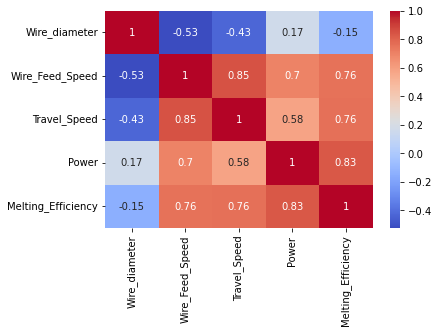

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

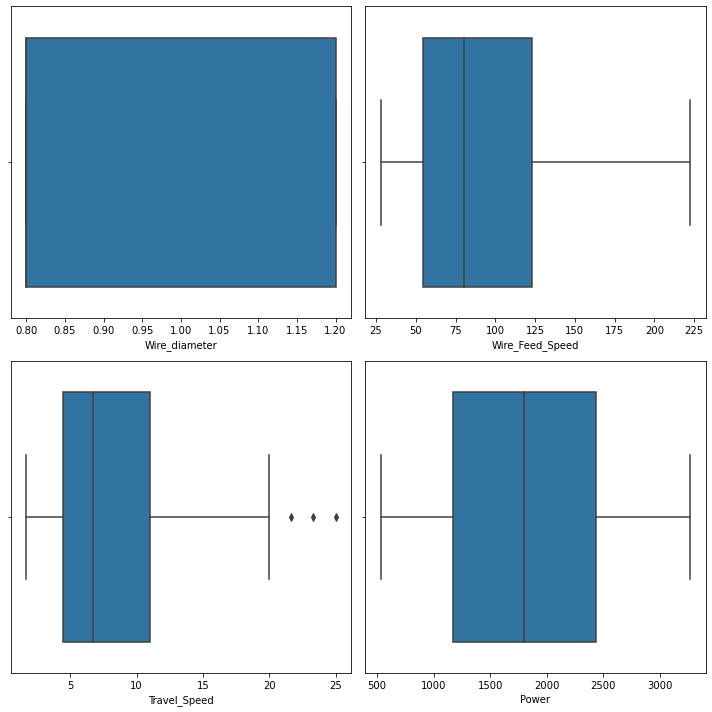

In [9]:
parameters = ['Wire_diameter', 'Wire_Feed_Speed','Travel_Speed','Power']

fig = plt.figure()
fig.set_size_inches((10,10))
for i,parameter in enumerate(parameters):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[parameter])

plt.tight_layout()

<h3 style='color:orange' align='left'>Feature Scaling and defining dependent and independent variables</h3> 

In [10]:
X=df.drop(['Melting_Efficiency'],axis='columns')
y=df['Melting_Efficiency']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
X_scaled=pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3
0,0.0,0.058252,0.143102,0.000000
1,0.0,0.104524,0.214225,0.059452
2,0.0,0.199640,0.286204,0.156647
3,0.0,0.267352,0.357326,0.212801
4,0.0,0.341028,0.428877,0.272903


<h3 style='color:orange' align='left'>Splitting the dataset for training and testing, importing the regressors</h3> 

In [13]:
from sklearn.model_selection import train_test_split
X_scaled_train,X_scaled_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=7)

In [14]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
regressors = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    SVR(),
    DecisionTreeRegressor()
]

<h3 style='color:orange' align='left'>Checking the scores and mean square error of different regressors</h3> 

In [16]:
scores=[]

for model in regressors[:] :
    model.fit(X_scaled_train, y_train.values.ravel())
    y_pred = model.predict(X_scaled_test)   
    scores.append({
        'Model':model,
        'Score':model.score(X_scaled_test, y_test.values.ravel()),
        'Mean_Square_Error':mean_squared_error(y_test, y_pred),
    })

results = pd.DataFrame(scores,columns=['Model','Score','Mean_Square_Error'])
results

,Model,Score,Mean_Square_Error
0,LinearRegression(),0.885160,0.000283
1,Ridge(),0.842658,0.000387
2,Lasso(),-0.093853,0.002693
3,"(ExtraTreeRegressor(random_state=487401254), E...",0.953590,0.000114
4,"(DecisionTreeRegressor(max_features='auto', ra...",0.938329,0.000152
5,SVR(),0.238273,0.001875
6,DecisionTreeRegressor(),0.905594,0.000232


In [17]:
results.nlargest(3, ['Score'])

,Model,Score,Mean_Square_Error
3,"(ExtraTreeRegressor(random_state=487401254), E...",0.953590,0.000114
4,"(DecisionTreeRegressor(max_features='auto', ra...",0.938329,0.000152
6,DecisionTreeRegressor(),0.905594,0.000232


<h4 style='color:red' align='left'>Here are the top three regressors for this dataset.</h4><h4 style='color:red' align='left'>Let's optimize the model further by hyperparameter tuning.</h4>

<h3 style='color:orange' align='left'>Hyperparameter tuning of Extra Tree Regressor</h3> 

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [19]:
ne=[5,10,50,100,250,500]
r_s=[0,5,10,20,50]
criteria=['squared_error','absolute_error']

scores_etr=[]


for n,r,c in itertools.product(ne,r_s,criteria):

    model_etr=ExtraTreesRegressor(n_estimators=n,random_state=r,criterion=c)
    model_etr.fit(X_train, y_train.values.ravel())
    model_etr.score(X_test, y_test.values.ravel())
    y_pred_etr=model_etr.predict(X_test)
    scores_etr.append({
                'n_estimator':n,
                'Random_state':r,
                'Criterion':c,
                'Score':model_etr.score(X_test, y_test.values.ravel()),
                'Mean_Square_Error':mean_squared_error(y_test, y_pred_etr)
            })

results_etr = pd.DataFrame(scores_etr,columns=['n_estimator','Random_state','Criterion','Score','Mean_Square_Error'])
results_etr.head()

,n_estimator,Random_state,Criterion,Score,Mean_Square_Error
0,5,0,squared_error,0.908339,0.000226
1,5,0,absolute_error,0.897700,0.000252
2,5,5,squared_error,0.973507,0.000065
3,5,5,absolute_error,0.937674,0.000153
4,5,10,squared_error,0.948072,0.000128


In [20]:
max_score = results_etr.loc[results_etr['Score'].idxmax()]
max_score

n_estimator                      5
Random_state                     5
Criterion            squared_error
Score                     0.973507
Mean_Square_Error         0.000065
Name: 2, dtype: object

<h4 style='color:red' align='left'>We have the best parameters of Extra Tree Regressor for the dataset.</h4>

<h3 style='color:orange' align='left'>Finalizing Extra Tree Regressor model</h3> 

In [21]:
model_etr_final=ExtraTreesRegressor(n_estimators=5,random_state=5,criterion='squared_error')

In [22]:
model_etr_final.fit(X_train, y_train.values.ravel())
y_pred_etr_final=model_etr_final.predict(X_test)

In [23]:
model_etr_final.score(X_test, y_test.values.ravel())

0.9735068227035888

In [24]:
mean_squared_error(y_test, y_pred_etr_final)

6.521866666666688e-05

In [25]:
y_pred_train=model_etr_final.predict(X_train)

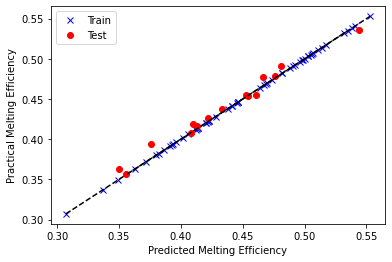

In [26]:
plt.plot(y_train, y_pred_train, 'bx', label = 'Train')
plt.plot([y_pred_train.min(), y_pred_train.max()], [y_pred_train.min(), y_pred_train.max()], 'k--')
plt.plot(y_test, y_pred_etr_final, 'ro', label = 'Test')
plt.plot([y_pred_etr_final.min(), y_pred_etr_final.max()], [y_pred_etr_final.min(), y_pred_etr_final.max()], 'k--')
plt.legend()
plt.xlabel('Predicted Melting Efficiency')
plt.ylabel('Practical Melting Efficiency')

print()

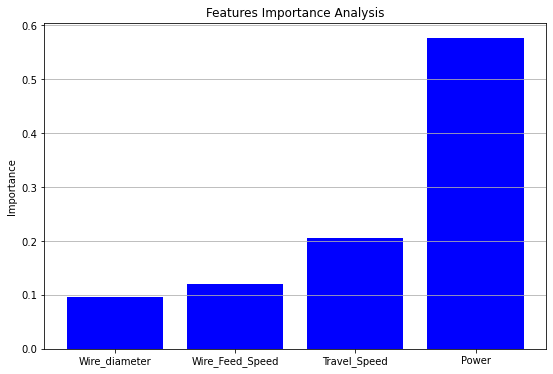

In [27]:
importance = model_etr_final.feature_importances_

x_pos = np.arange(len(parameters))


fig, ax = plt.subplots()
fig.set_size_inches((9,6))

ax.bar(x_pos, importance, align='center', alpha=1, color='blue')
ax.set_ylabel('Importance')
ax.set_xticks(x_pos)
ax.set_xticklabels(parameters)
ax.set_title('Features Importance Analysis')
ax.yaxis.grid(True)

<h3 style='color:orange' align='left'>Hyperparameter tuning of Random Forest Regressor</h3> 

In [28]:
ne=[10,25,50,75,100,150,200]
r_s=[1,2,4,6,8,10]
criteria=['squared_error','absolute_error','friedman_mse','poisson']

scores_rfr=[]

for ne,rs,c in itertools.product(ne,r_s,criteria):

    model_rfr=RandomForestRegressor(n_estimators=ne,criterion=c,random_state=rs)
    model_rfr.fit(X_scaled_train, y_train.values.ravel())
    model_rfr.score(X_scaled_test, y_test.values.ravel())
    y_pred_rfr=model_rfr.predict(X_scaled_test)
    scores_rfr.append({
                 'N_estimators':ne,
                 'Random_state':rs,
                 'Criterion':c,
                 'Score':model_rfr.score(X_scaled_test, y_test.values.ravel()),
                 'Mean_Square_Error':mean_squared_error(y_test, y_pred_rfr)
                    })

results_rfr = pd.DataFrame(scores_rfr,columns=['N_estimators','Random_state','Criterion','Score','Mean_Square_Error'])
results_rfr.head()

,N_estimators,Random_state,Criterion,Score,Mean_Square_Error
0,10,1,squared_error,0.946381,0.000132
1,10,1,absolute_error,0.930218,0.000172
2,10,1,friedman_mse,0.946692,0.000131
3,10,1,poisson,0.886730,0.000279
4,10,2,squared_error,0.929280,0.000174


In [29]:
max_score_rfr = results_rfr.loc[results_rfr['Score'].idxmax()]
max_score_rfr

N_estimators                   10
Random_state                    1
Criterion            friedman_mse
Score                    0.946692
Mean_Square_Error        0.000131
Name: 2, dtype: object

<h4 style='color:red' align='left'>We have the best parameters of Random Forest Regressor for the dataset.</h4>

<h3 style='color:orange' align='left'>Finalizing Random Forest Regressor model</h3> 

In [30]:
model_rfr_final=RandomForestRegressor(n_estimators=10,criterion='friedman_mse',random_state=1)
model_rfr_final.fit(X_train, y_train.values.ravel())
y_pred_rfr_final=model_rfr_final.predict(X_test)
model_rfr_final.score(X_test, y_test.values.ravel())

0.9466921893674873

In [31]:
mean_squared_error(y_test, y_pred_rfr_final)

0.0001312286666666664

In [32]:
y_pred_train=model_rfr_final.predict(X_train)

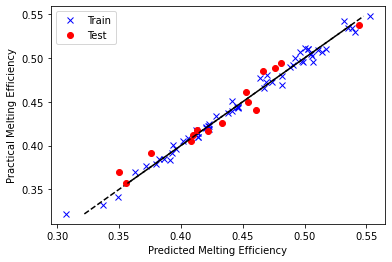

In [33]:
plt.plot(y_train, y_pred_train, 'bx', label = 'Train')
plt.plot([y_pred_train.min(), y_pred_train.max()], [y_pred_train.min(), y_pred_train.max()], 'k--')
plt.plot(y_test, y_pred_rfr_final, 'ro', label = 'Test')
plt.plot([y_pred_rfr_final.min(), y_pred_rfr_final.max()], [y_pred_rfr_final.min(), y_pred_rfr_final.max()], 'k--')
plt.legend()
plt.xlabel('Predicted Melting Efficiency')
plt.ylabel('Practical Melting Efficiency')

print()

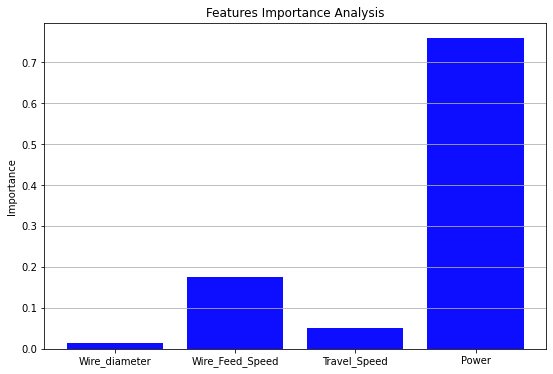

In [34]:
importance = model_rfr_final.feature_importances_

x_pos = np.arange(len(parameters))


fig, ax = plt.subplots()
fig.set_size_inches((9,6))

ax.bar(x_pos, importance, align='center', alpha=0.95, color='blue')
ax.set_ylabel('Importance')
ax.set_xticks(x_pos)
ax.set_xticklabels(parameters)
ax.set_title('Features Importance Analysis')
ax.yaxis.grid(True)

<h3 style='color:orange' align='left'>Hyperparameter tuning of Decision Tree Regressor</h3> 

In [35]:
splitters=['best','random']
r_s=[1,2,4,6,8,10]
criteria=['squared_error','absolute_error','friedman_mse','poisson']

scores_dtr=[]


for s,rs,c in itertools.product(splitters,r_s,criteria):

    model_dtr=DecisionTreeRegressor(splitter=s,criterion=c,random_state=rs)
    model_dtr.fit(X_scaled_train, y_train.values.ravel())
    model_dtr.score(X_scaled_test, y_test.values.ravel())
    y_pred_dtr=model_dtr.predict(X_scaled_test)
    scores_dtr.append({
                 'Splitter':s,
                 'Random_state':rs,
                 'Criterion':c,
                 'Score':model_dtr.score(X_scaled_test, y_test.values.ravel()),
                 'Mean_Square_Error':mean_squared_error(y_test, y_pred_rfr)
                    })

results_dtr = pd.DataFrame(scores_dtr,columns=['Splitter','Random_state','Criterion','Score','Mean_Square_Error'])
results_dtr.head()

,Splitter,Random_state,Criterion,Score,Mean_Square_Error
0,best,1,squared_error,0.905161,0.000271
1,best,1,absolute_error,0.872636,0.000271
2,best,1,friedman_mse,0.907869,0.000271
3,best,1,poisson,0.853923,0.000271
4,best,2,squared_error,0.927341,0.000271


In [36]:
max_score_dtr = results_dtr.loc[results_dtr['Score'].idxmax()]
max_score_dtr

Splitter                     best
Random_state                    6
Criterion            friedman_mse
Score                    0.935384
Mean_Square_Error        0.000271
Name: 14, dtype: object

<h4 style='color:red' align='left'>We have the best parameters of Decision Tree Regressor for the dataset.</h4>

<h3 style='color:orange' align='left'>Finalizing Decision Tree Regressor model</h3> 

In [37]:
model_dtr_final=DecisionTreeRegressor(splitter='best',criterion='friedman_mse',random_state=6)
model_dtr_final.fit(X_train, y_train.values.ravel())
y_pred_dtr_final=model_dtr_final.predict(X_test)
model_dtr_final.score(X_test, y_test.values.ravel())

0.9353838154421668

In [38]:
mean_squared_error(y_test, y_pred_dtr_final)

0.00015906666666666672

In [39]:
y_pred_train=model_rfr_final.predict(X_train)

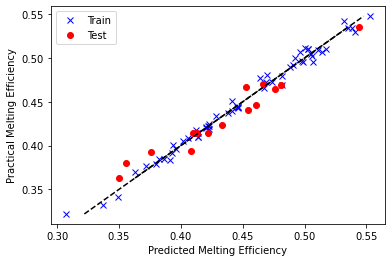

In [40]:
plt.plot(y_train, y_pred_train, 'bx', label = 'Train')
plt.plot([y_pred_train.min(), y_pred_train.max()], [y_pred_train.min(), y_pred_train.max()], 'k--')
plt.plot(y_test, y_pred_dtr_final, 'ro', label = 'Test')
plt.plot([y_pred_dtr_final.min(), y_pred_dtr_final.max()], [y_pred_dtr_final.min(), y_pred_dtr_final.max()], 'k--')
plt.legend()
plt.xlabel('Predicted Melting Efficiency')
plt.ylabel('Practical Melting Efficiency')

print()

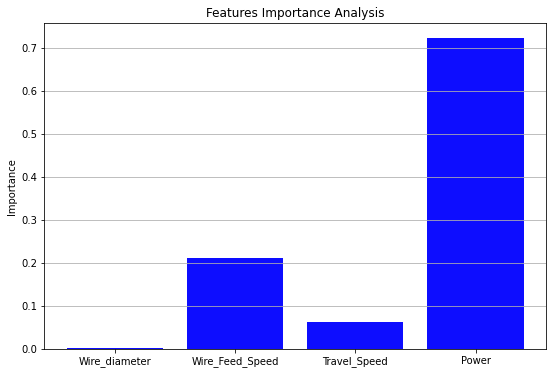

In [41]:
importance = model_dtr_final.feature_importances_

x_pos = np.arange(len(parameters))


fig, ax = plt.subplots()
fig.set_size_inches((9,6))

ax.bar(x_pos, importance, align='center', alpha=0.95, color='blue')
ax.set_ylabel('Importance')
ax.set_xticks(x_pos)
ax.set_xticklabels(parameters)
ax.set_title('Features Importance Analysis')
ax.yaxis.grid(True)

In [42]:
print('Scores:\nExtra Tree Regressor:\t\t',model_etr_final.score(X_test, y_test.values.ravel()),'\nRandom Forest Regressor:\t',model_rfr_final.score(X_test, y_test.values.ravel()),'\nDecision Tree Regressor:\t',model_dtr_final.score(X_test, y_test.values.ravel()))

Scores:
Extra Tree Regressor:		 0.9735068227035888 
Random Forest Regressor:	 0.9466921893674873 
Decision Tree Regressor:	 0.9353838154421668


<h2 style='color:Blue' align='left'>Extra Tree Regressor is the best regressor to predict Melting Efficiency  </h2> 